In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_excel("Predictive maintenance system for network infrastructure.xlsx")  # Adjust if necessary
df.head(10)

,Timestamp,Device,CPU (%),Memory (%),Errors (Count),Traffic (Mbps),Current Status,System State,Historical State,Future State Prediction
0,2024-11-22 09:20:00,Router_A,99.88,36.92,1,213.78,Critical,Future,NaN,Critical
1,2024-11-22 09:25:00,Firewall_1,49.51,58.82,4,130.31,Healthy,Future,NaN,Healthy
2,2024-11-22 11:00:00,Switch_3,54.81,83.62,27,355.47,At Risk,Future,NaN,Healthy
3,2024-11-22 11:05:00,Router_C,63.68,86.95,15,356.59,Healthy,Future,NaN,At Risk
4,2024-11-22 11:35:00,Router_A,25.42,89.29,48,79.45,Healthy,Future,NaN,Critical
5,2024-11-22 12:00:00,Switch_1,37.25,69.03,33,209.37,Healthy,Historical,Overloaded,NaN
6,2024-11-22 12:35:00,Router_B,63.00,39.63,21,64.75,At Risk,Future,NaN,Healthy
7,2024-11-22 13:10:00,Switch_1,62.70,67.34,35,398.76,Healthy,Future,NaN,Healthy
8,2024-11-22 13:20:00,Router_B,95.50,86.14,46,102.76,Healthy,Future,NaN,Critical
9,2024-11-22 14:30:00,Router_A,75.91,57.70,12,162.70,Critical,Future,NaN,At Risk


In [3]:
# Select features and target variable
features = ["CPU (%)", "Memory (%)", "Errors (Count)", "Traffic (Mbps)"]
target = "Current Status"

# Drop rows with missing target or feature values
df_cleaned = df[features + [target]].dropna()

# Encode the target variable
label_encoder = LabelEncoder()
df_cleaned[target] = label_encoder.fit_transform(df_cleaned[target])

In [4]:
# Separate features (X) and target (y)
X = df_cleaned[features]
y = df_cleaned[target]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [5]:
# Train the SVM classifier
svm = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)
y_pred[:10]

array([0, 1, 2, 0, 1, 1, 2, 1, 0, 0])

In [6]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

# Assuming `label_encoder.classes_` contains the class names
class_names = label_encoder.classes_

# Generate the classification report with class names
classification_rep = classification_report(y_test, y_pred, target_names=class_names)

print("Classification Report:")
print(classification_rep)

Accuracy: 0.30

Classification Report:
              precision    recall  f1-score   support

     At Risk       0.31      0.28      0.30       388
    Critical       0.30      0.42      0.35       374
     Healthy       0.28      0.20      0.23       393

    accuracy                           0.30      1155
   macro avg       0.30      0.30      0.29      1155
weighted avg       0.30      0.30      0.29      1155



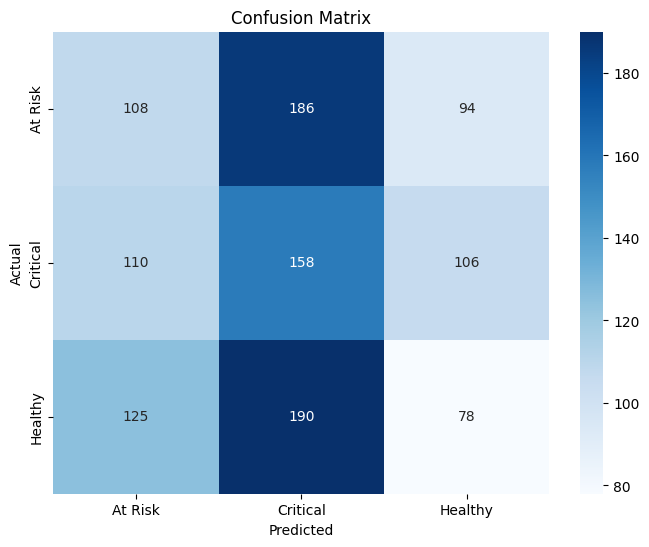

In [7]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show();